In [2]:
import matplotlib as mpl ; mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [47]:
data1=pd.read_csv('/content/gdrive/My Drive/extremum_20200729150034.csv',encoding = 'euc-kr')
data2=pd.read_csv('/content/gdrive/My Drive/extremum_20200729151659.csv',encoding = 'euc-kr')
data1

,지점명,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),\t최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
0,서울,10-Jan,-4.5,-0.7,8.4,2010-01-20,-8.1,-15.3,2010-01-13
1,서울,10-Feb,1.4,4.9,17.9,2010-02-24,-1.7,-10.8,2010-02-03
2,서울,10-Mar,4.3,8.1,14.2,2010-03-30,0.5,-4.0,2010-03-10
3,서울,10-Apr,9.5,14.0,20.7,2010-04-20,5.6,1.1,2010-04-03
4,서울,10-May,17.2,22.0,28.6,2010-05-21,13.0,5.8,2010-05-01
...,...,...,...,...,...,...,...,...,...
122,서울,20-Mar,7.7,13.3,20.6,2020-03-26,2.6,-2.8,2020-03-05
123,서울,20-Apr,11.1,16.6,23.8,2020-04-16,6.3,1.9,2020-04-05
124,서울,20-May,18.0,23.3,30.0,2020-05-30,13.7,9.2,2020-05-20
125,서울,20-Jun,23.9,29.0,35.4,2020-06-22,19.9,14.8,2020-06-02


In [49]:
data2

,지점명,일시,강수량(mm),일최다강수량(mm),일최다강수량일자,1시간최다강수량(mm),1시간최다강수량일자
0,서울,10-Jan,29.3,14.2,2010-01-04,NaN,NaN
1,서울,10-Feb,55.3,26.5,2010-02-25,NaN,NaN
2,서울,10-Mar,82.5,17.0,2010-03-01,NaN,NaN
3,서울,10-Apr,62.8,27.0,2010-04-26,6.5,2010-04-26
4,서울,10-May,124.0,59.0,2010-05-18,9.5,2010-05-18
...,...,...,...,...,...,...,...
122,서울,20-Mar,16.3,11.8,2020-03-10,NaN,NaN
123,서울,20-Apr,16.9,10.3,2020-04-19,3.9,2020-04-17
124,서울,20-May,112.4,29.8,2020-05-18,19.8,2020-05-18
125,서울,20-Jun,139.6,64.7,2020-06-30,15.9,2020-06-30


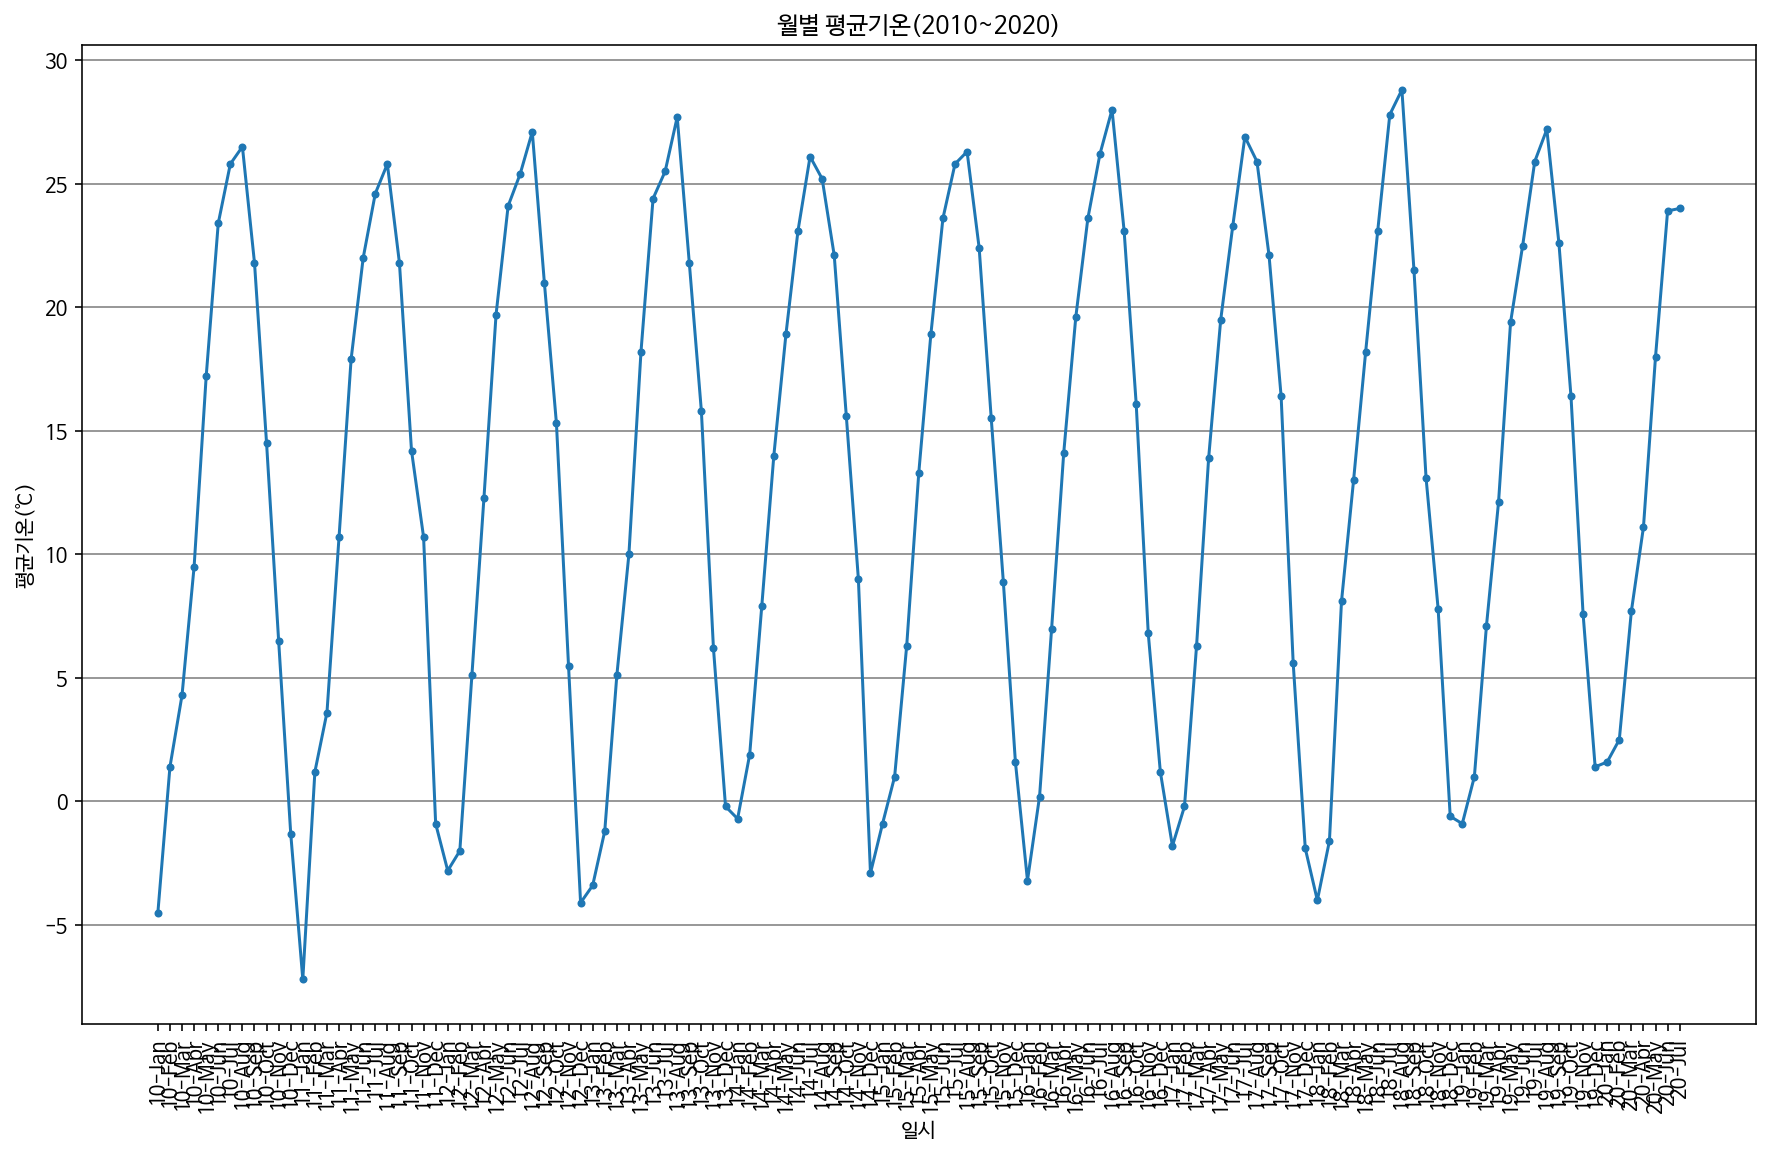

In [77]:
fig, ax = plt.subplots(figsize=(15,9))
ax.plot(data1['일시'],data1['평균기온(℃)'],marker='.')
ax.grid(True, color='gray', linestyle='-',axis='y')
ax.set_xticklabels(data1['일시'],rotation=90)
ax.set_xlabel('일시')
ax.set_ylabel('평균기온(℃)')
ax.set_title('월별 평균기온(2010~2020)')
plt.show()

In [56]:
data1_diff = pd.Series.diff(data1['평균기온(℃)'],periods=12,)
data1_diff = data1_diff.dropna(axis=0)
data1_diff

12    -2.7
13    -0.2
14    -0.7
15     1.2
16     0.7
      ... 
122    0.6
123   -1.0
124   -1.4
125    1.4
126   -1.9
Name: 평균기온(℃), Length: 115, dtype: float64

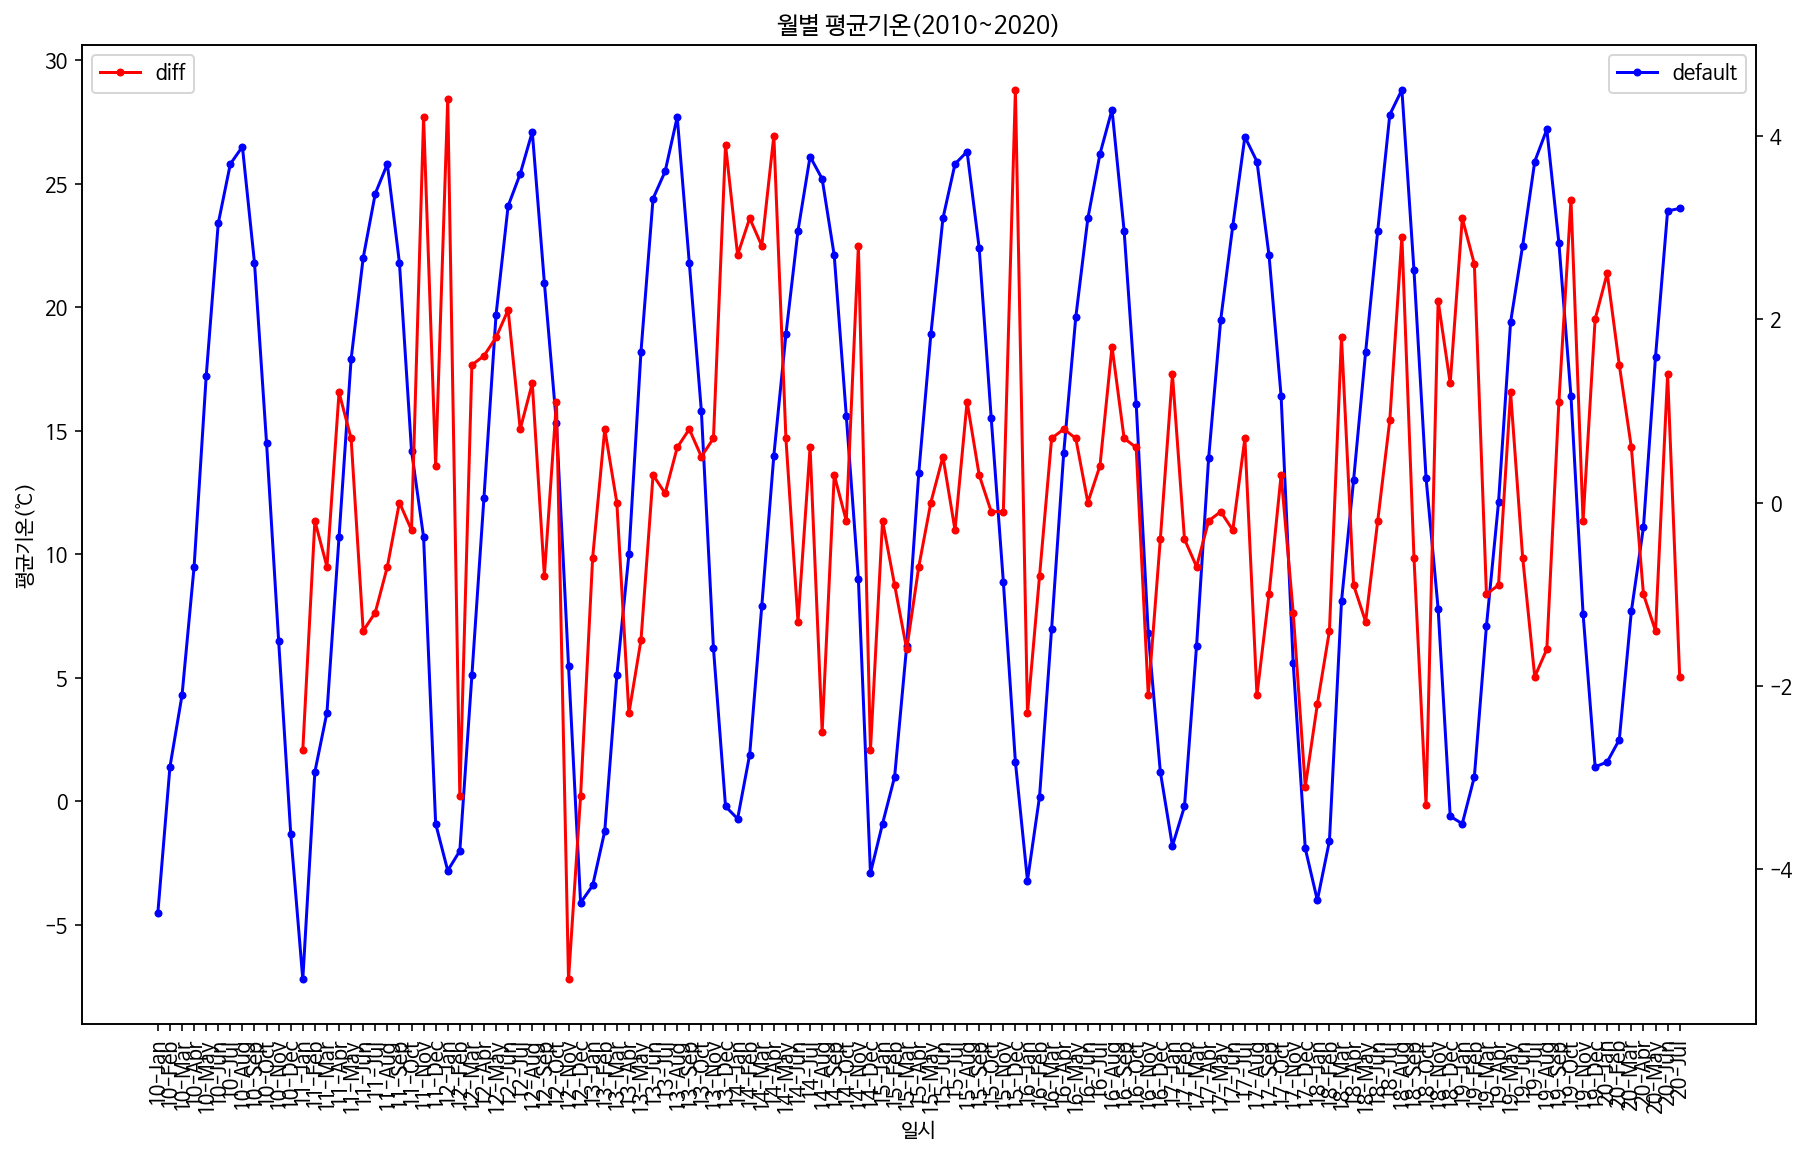

In [78]:
fig, ax = plt.subplots(figsize=(15,9))
ax.plot(data1['일시'], data1['평균기온(℃)'],marker='.',label='default',color='b')
ax2 = ax.twinx()
ax2.plot( data1_diff, color='r', label='diff',marker='.')
ax.legend(loc='upper right')
ax2.legend(loc='upper left')
ax.set_xticklabels(data1['일시'], rotation=90)
ax.set_xlabel('일시')
ax.set_ylabel('평균기온(℃)')
ax.set_title('월별 평균기온(2010~2020)')
plt.show()

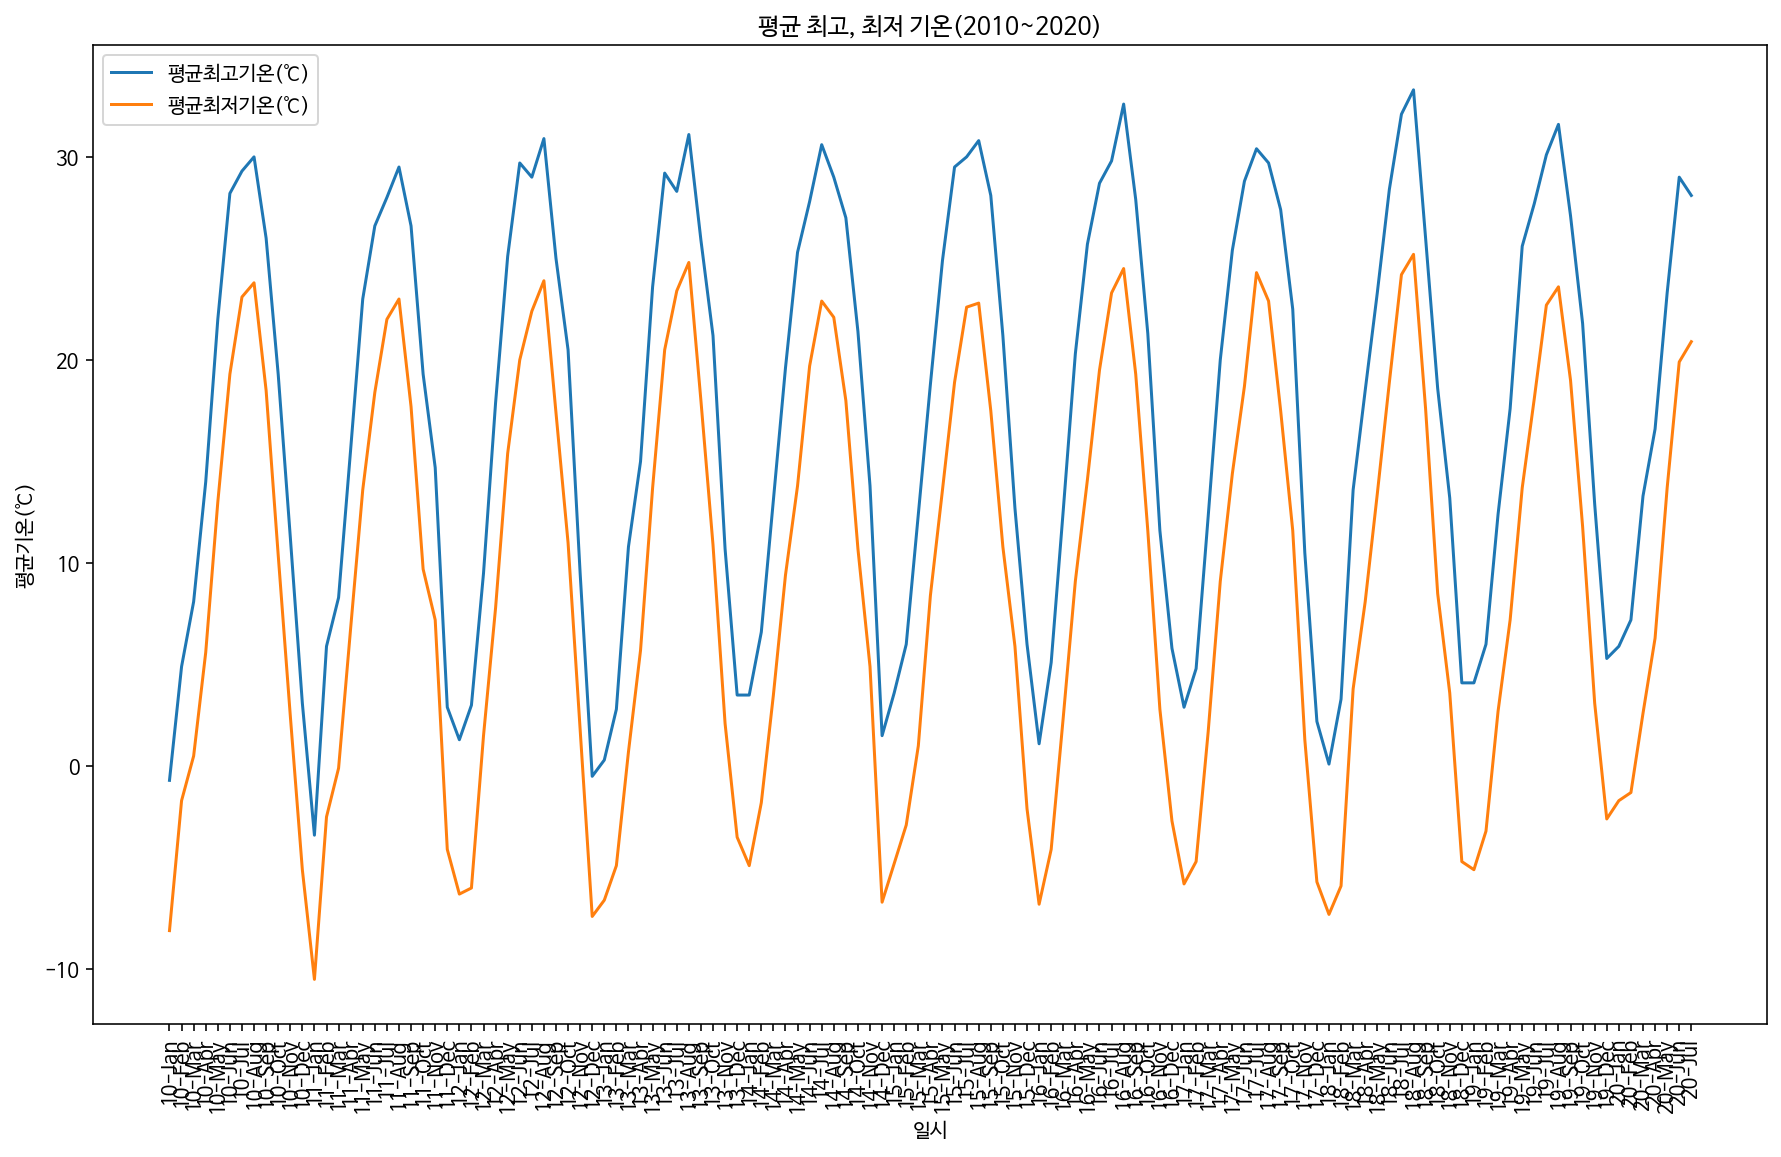

In [74]:
fig, ax = plt.subplots(figsize=(15,9))
ax.plot(data1['일시'], data1['평균최고기온(℃)'], label='평균최고기온(℃)')
ax.plot(data1['일시'], data1['평균최저기온(℃)'], label='평균최저기온(℃)')
ax.set_xticklabels(data1['일시'], rotation=90)

ax.set_xlabel('일시')
ax.set_ylabel('평균기온(℃)')
ax.set_title('평균 최고, 최저 기온(2010~2020)')
ax.legend()
plt.show()

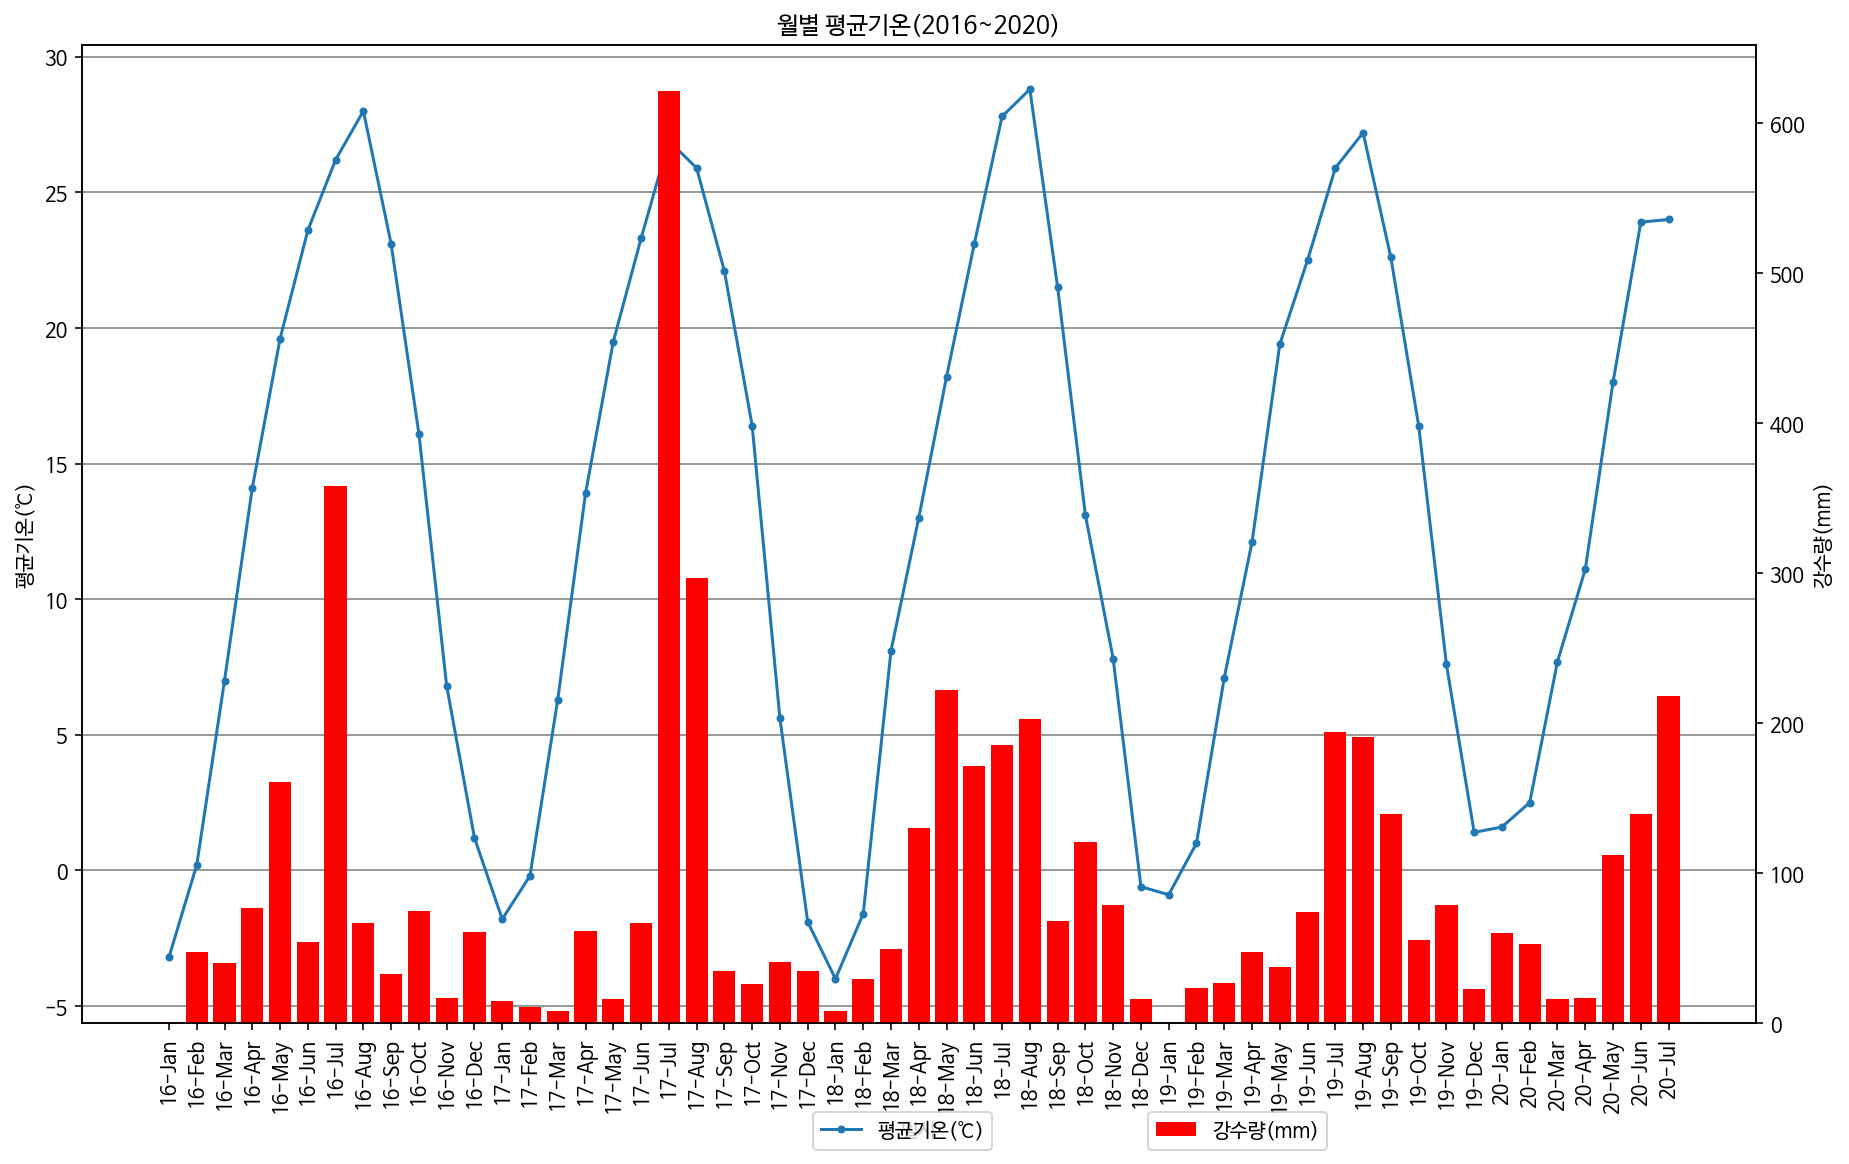

In [98]:
data1=data1.iloc[72:127,:]
data2=data2.iloc[72:127,:]
fig, ax = plt.subplots(figsize=(15,9))
ax.plot(data1['일시'],data1['평균기온(℃)'],marker='.',label='평균기온(℃)')
ax.grid(True, color='gray', linestyle='-',axis='y')
ax.set_xticklabels(data1['일시'],rotation=90)
ax.set_xlabel('일시')
ax.set_ylabel('평균기온(℃)')
ax2 = ax.twinx()
ax2.bar(data2['일시'],data2['강수량(mm)'],color='r',label='강수량(mm)')
ax2.set_ylabel('강수량(mm)')
ax.set_title('월별 평균기온(2016~2020)')
ax.legend(bbox_to_anchor=(0.55, -0.08))
ax2.legend(bbox_to_anchor=(0.75, -0.08))
plt.show()

In [82]:
data3=pd.read_csv('/content/gdrive/My Drive/STCS_우리나라기후평년값_SESN_20200729150524.csv')
data3

,지점명,평균기온(°C),최고기온(°C),최저기온(°C),강수량(mm),습도(%),일조시간(hr)
0,속초,21.9,25.2,19.0,655.6,81.1,452.4
1,철원,22.7,27.6,18.6,877.1,77.6,471.8
2,동두천,23.3,28.6,19.2,975.1,76.0,439.8
3,대관령,17.9,22.1,14.4,948.5,84.0,448.6
4,춘천,23.6,28.8,19.3,824.4,77.1,513.8
...,...,...,...,...,...,...,...
67,합천,24.1,29.5,19.7,750.8,73.9,523.0
68,밀양,24.3,29.6,19.9,693.5,75.4,529.5
69,산청,23.7,29.1,19.5,885.6,75.9,538.7
70,거제,23.6,27.5,20.3,1031.9,74.8,511.3


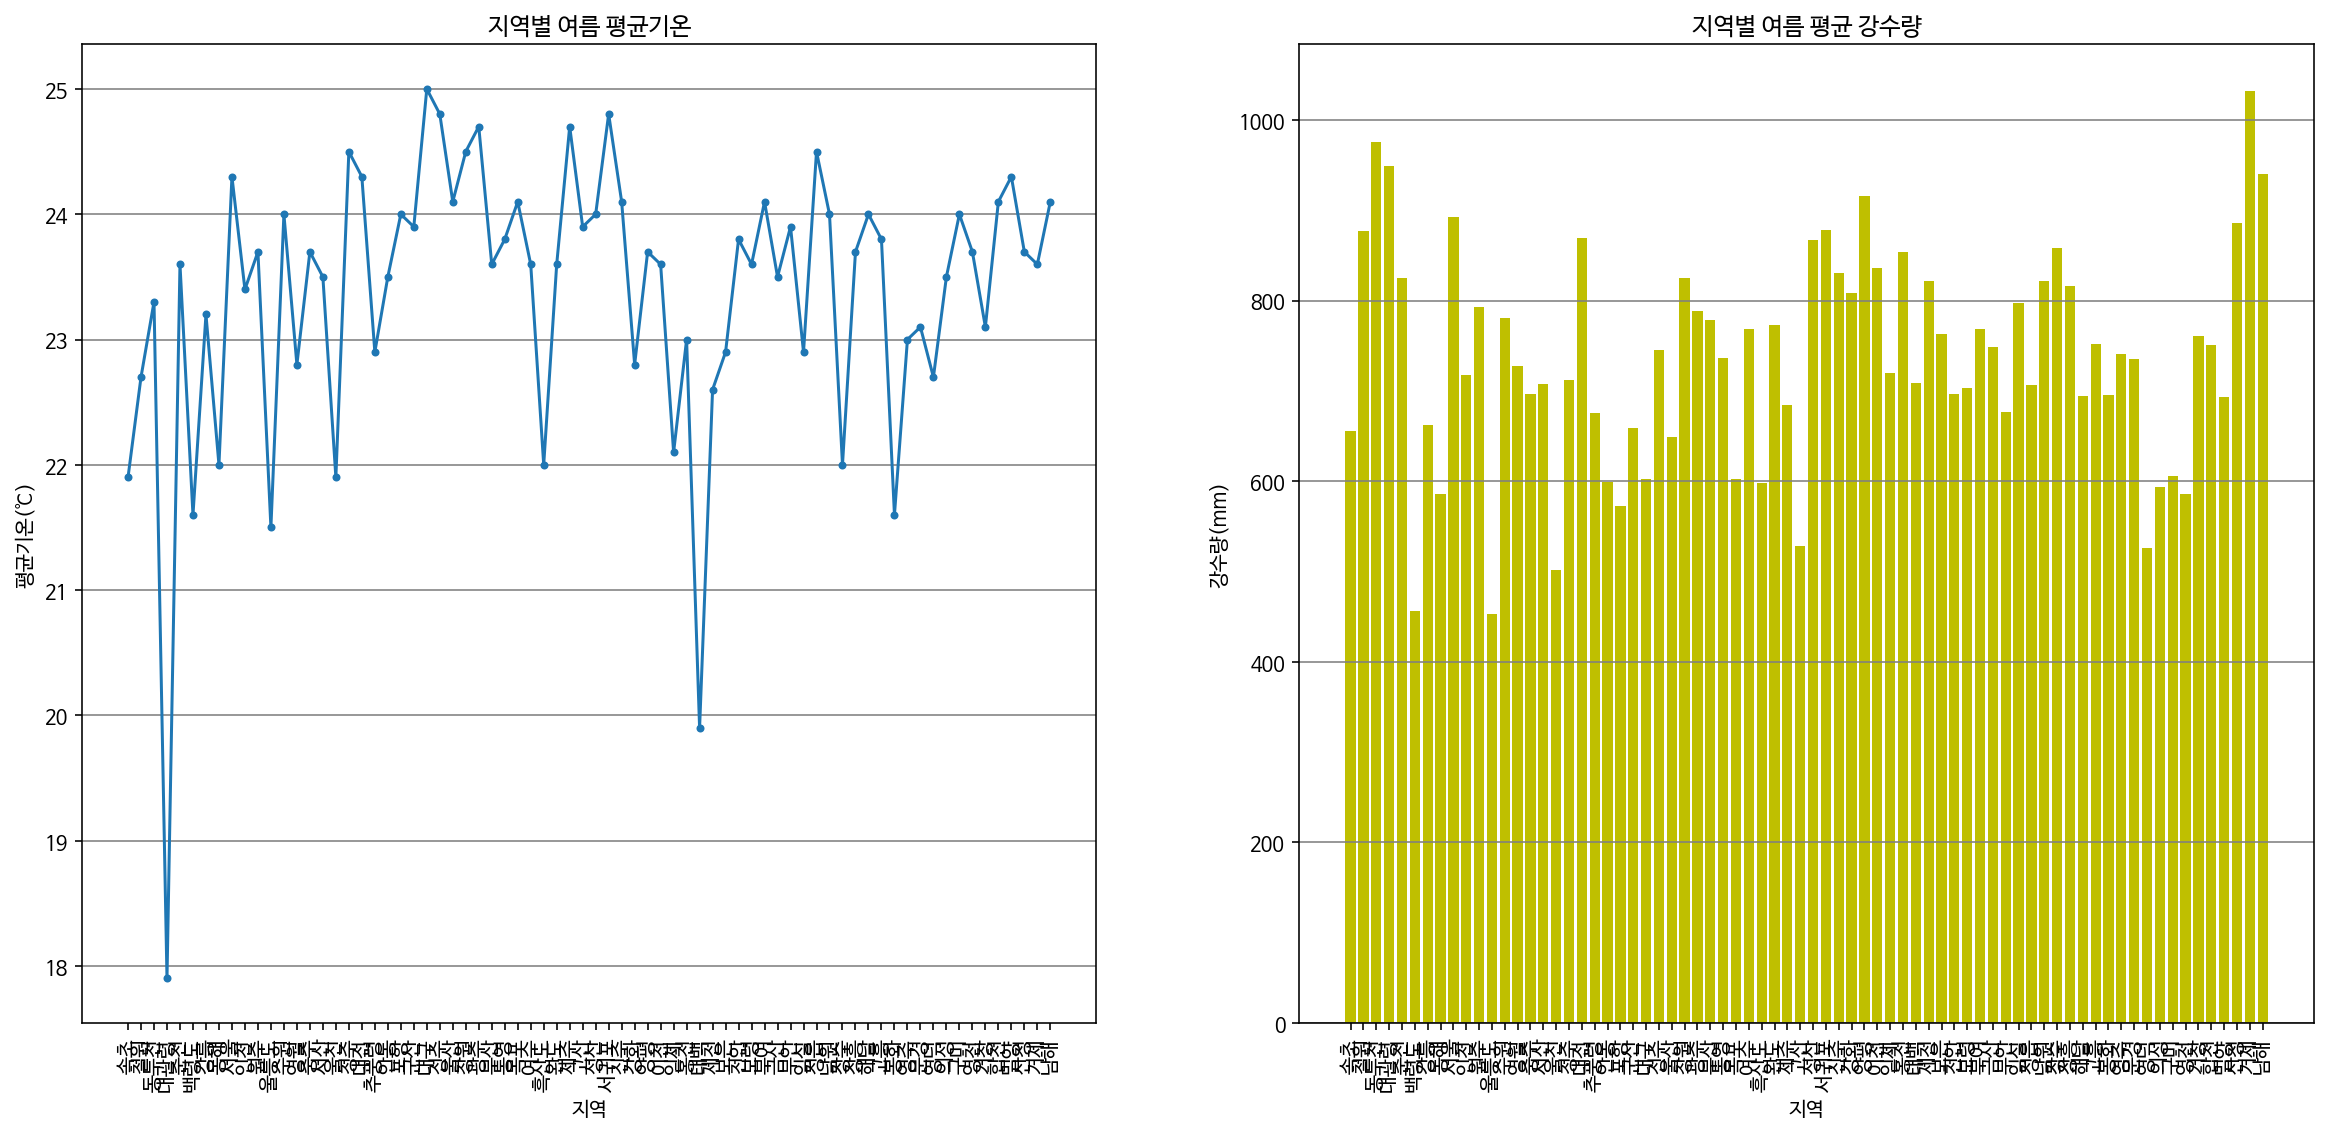

In [115]:
fig, ax = plt.subplots(1,2, sharex=False, sharey=False, figsize=(20,9))
ax[0].plot(data3['지점명'],data3['평균기온(°C)'],marker='.',label='평균기온(℃)')
ax[0].grid(True, color='gray', linestyle='-',axis='y')
ax[0].set_xticklabels(data3['지점명'],rotation=90)
ax[0].set_xlabel('지역')
ax[0].set_ylabel('평균기온(℃)')
ax[0].set_title('지역별 여름 평균기온')
ax[1].bar(data3['지점명'],data3['강수량(mm)'],color='y',label='강수량(mm)')
ax[1].grid(True, color='gray', linestyle='-',axis='y')
ax[1].set_xticklabels(data3['지점명'],rotation=90)
ax[1].set_xlabel('지역')
ax[1].set_ylabel('강수량(mm)')
ax[1].set_title('지역별 여름 평균 강수량')

plt.show()

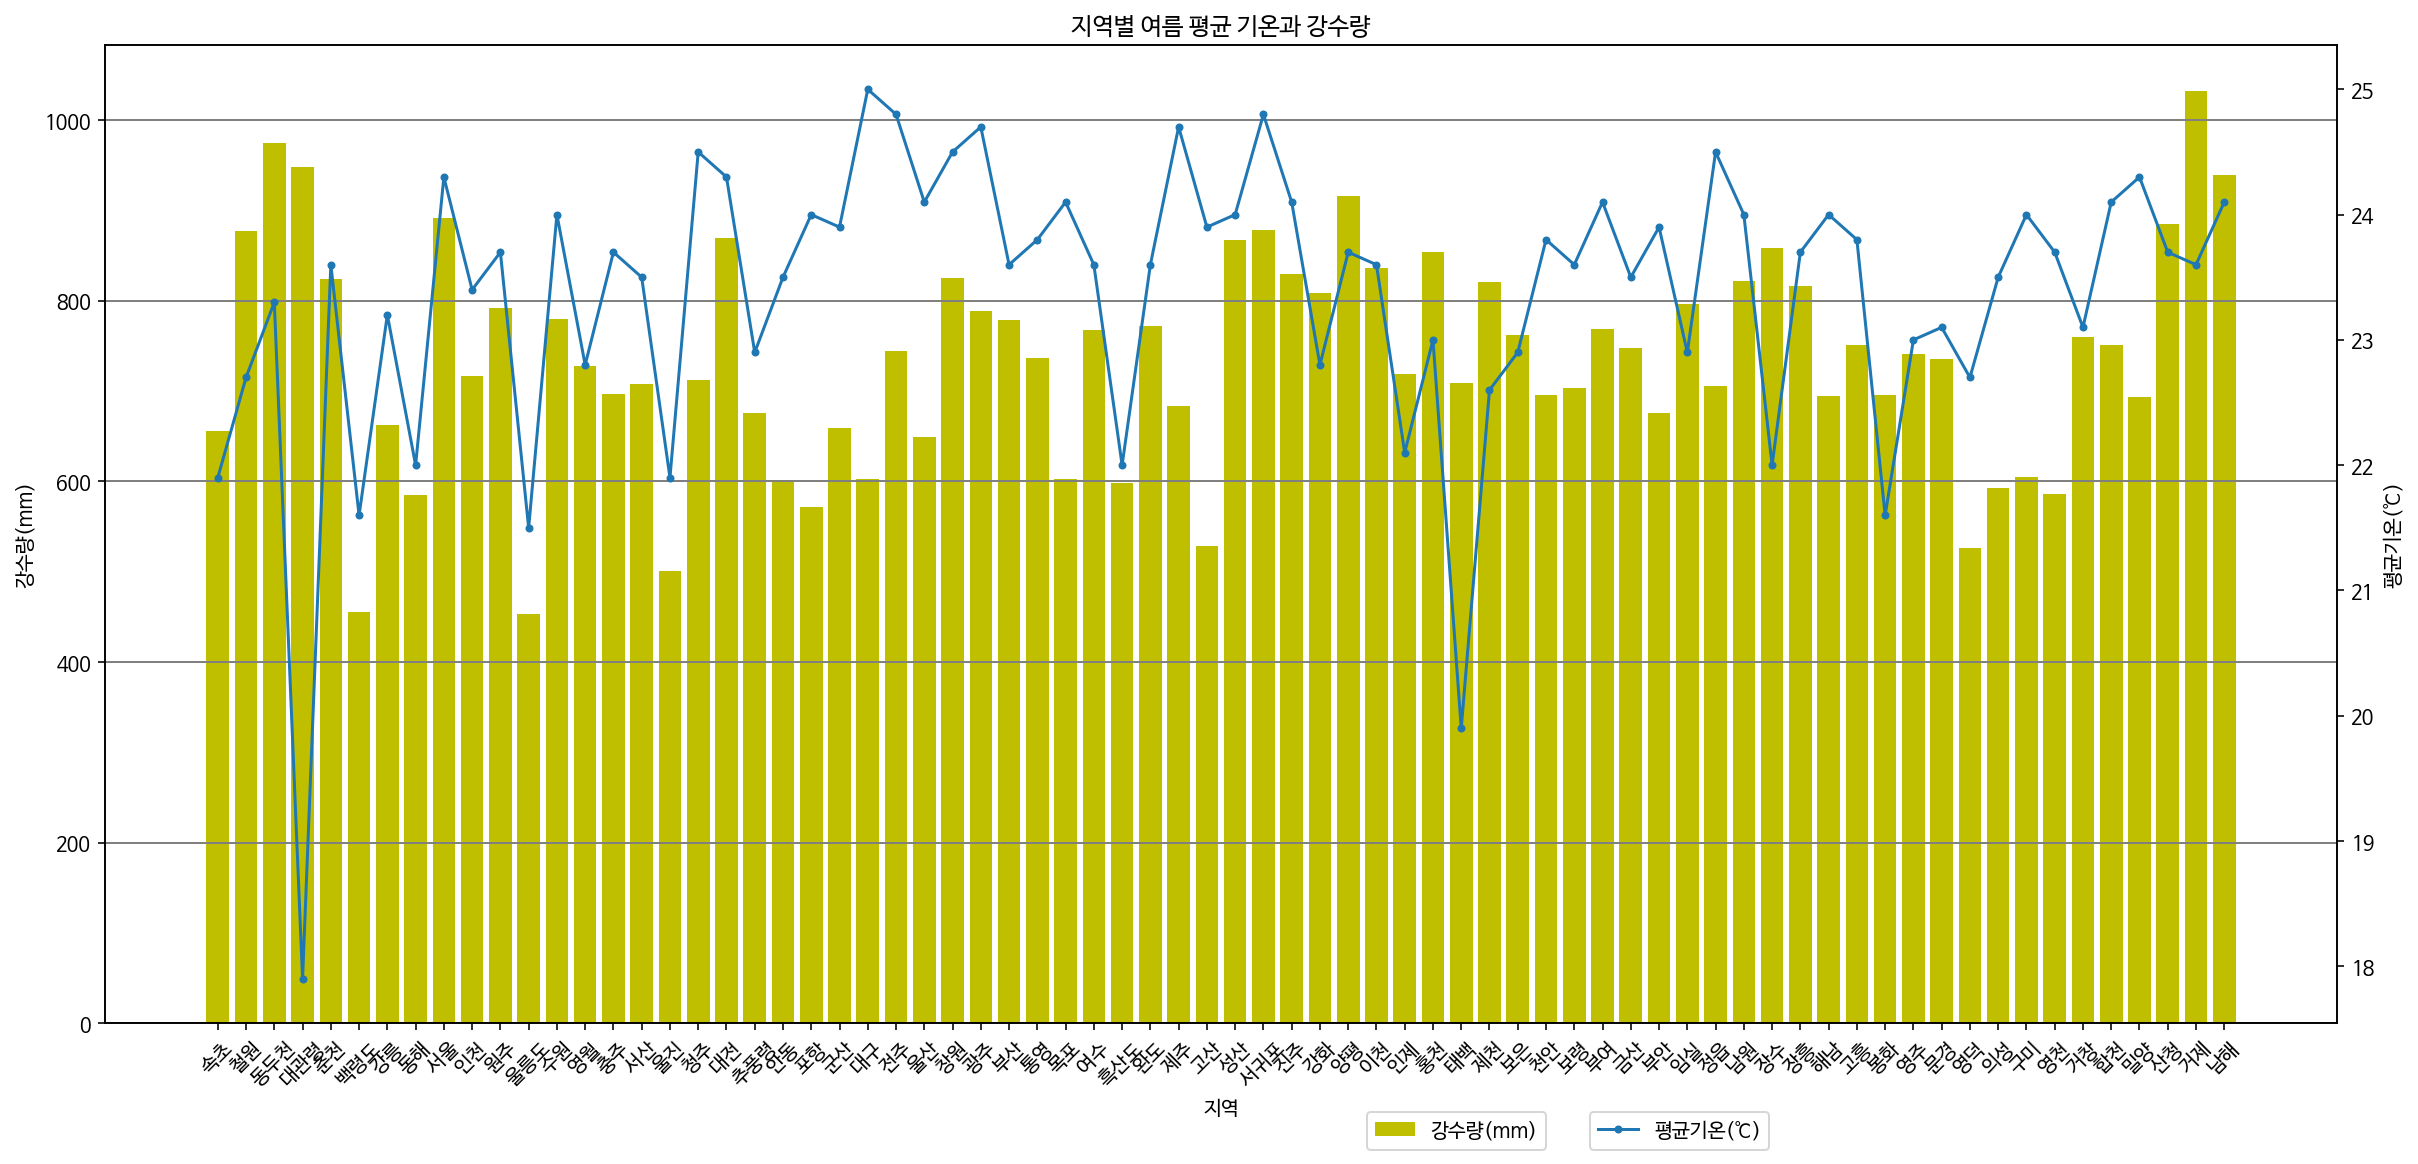

In [120]:
fig, ax = plt.subplots(figsize=(20, 9))
ax.grid(True, color='gray', linestyle='-', linewidth=1, axis='y')
ax.bar(data3['지점명'],data3['강수량(mm)'],color='y',label='강수량(mm)')
ax.set_xlabel('지역')
ax.set_xticklabels(data3['지점명'],rotation=45)
ax.set_ylabel('강수량(mm)')
ax2 = ax.twinx()
ax2.plot(data3['지점명'],data3['평균기온(°C)'],marker='.',label='평균기온(℃)')
ax2.set_ylabel('평균기온(℃)')
ax.set_title('지역별 여름 평균 기온과 강수량')
ax.legend(bbox_to_anchor=(0.65, -0.08))
ax2.legend(bbox_to_anchor=(0.75, -0.08))
plt.show()

In [97]:
data4=pd.read_csv('/content/gdrive/My Drive/일주일간 기온, 강수확률.csv')
data4 = data4.drop(['Unnamed: 3'], axis=1)
data4

,날짜,온도(℃),강수확률(%)
0,2020-07-30 오전,24,80
1,2020-07-30 오후,29,60
2,2020-07-31 오전,24,30
3,2020-07-31 오후,29,30
4,2020-08-01 오전,24,60
5,2020-08-01 오후,28,60
6,2020-08-02 오전,23,60
7,2020-08-02 오후,29,60
8,2020-08-03 오전,23,60
9,2020-08-03 오후,29,60


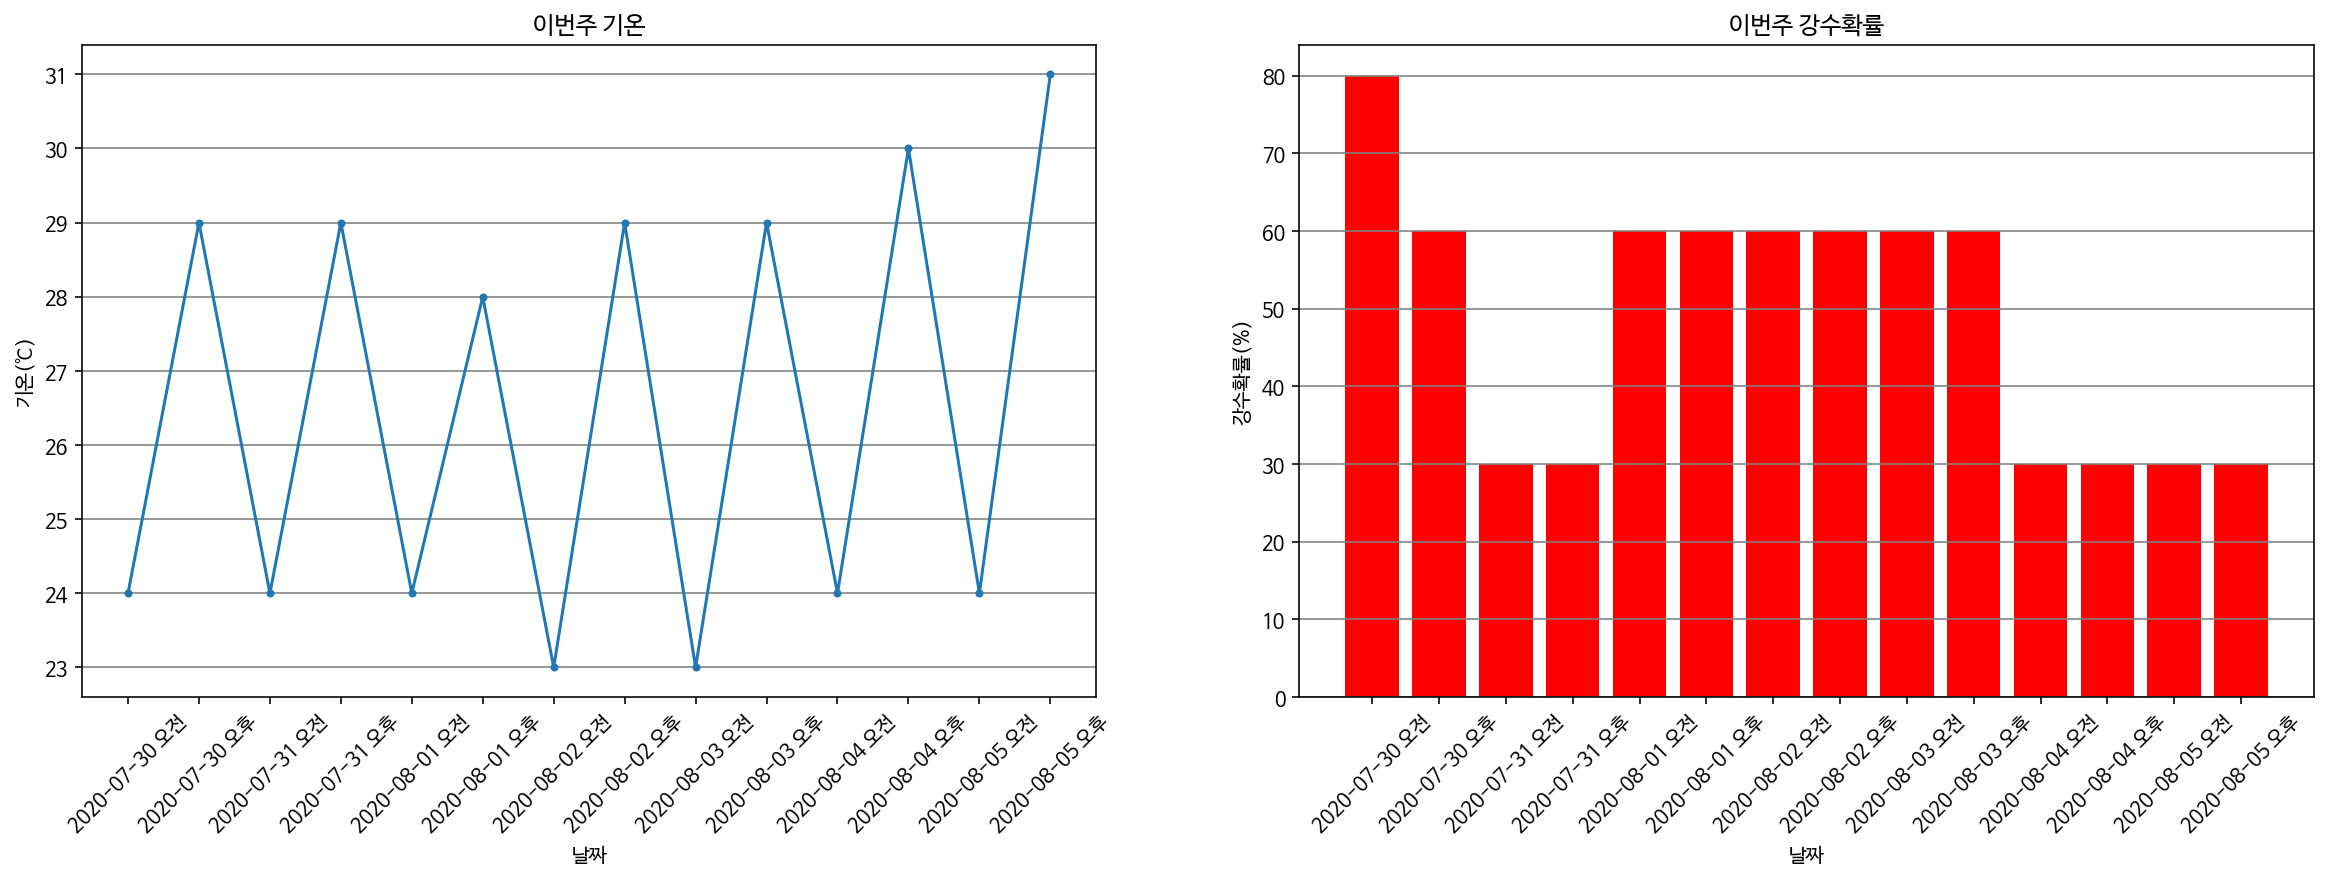

In [114]:
fig, ax = plt.subplots(1,2, sharex=False, sharey=False, figsize=(20,6))
ax[0].plot(data4['날짜'],data4['온도(℃)'],marker='.',label='기온(℃)')
ax[0].grid(True, color='gray', linestyle='-',axis='y')
ax[0].set_xticklabels(data4['날짜'],rotation=45)
ax[0].set_xlabel('날짜')
ax[0].set_ylabel('기온(℃)')
ax[0].set_title('이번주 기온')
ax[1].bar(data4['날짜'],data4['강수확률(%)'],color='r',label='강수확률(%)')
ax[1].grid(True, color='gray', linestyle='-',axis='y')
ax[1].set_xticklabels(data4['날짜'],rotation=45)
ax[1].set_xlabel('날짜')
ax[1].set_ylabel('강수확률(%)')
ax[1].set_title('이번주 강수확률')
plt.show()
